In [67]:
# Install janitor package and load libraries
install.packages("janitor")
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(janitor)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [68]:
# Read data
# Change quality from double type to factor type
# Clean the names to be in small letters using _ in the place of space
wine_data <- read_delim("https://raw.githubusercontent.com/rahim620/DSCI100-PROJECT-FALL23/main/data/winequality-red.csv", delim = ";") |>
    mutate(quality = as_factor(quality)) |>
    clean_names()
head(wine_data)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,p_h,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [69]:
# Split the wine data in training set and testing set
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

In [70]:
# Summarize the data
wine_summary <- wine_train |>
    group_by(quality) |>
    summarize(mean_alc = mean(alcohol, na.rm = TRUE), mean_free_so2 = mean(sulphates, na.rm = TRUE), mean_volatile_acidity = mean(volatile_acidity, na.rm = TRUE), observations = n())
wine_summary

quality,mean_alc,mean_free_so2,mean_volatile_acidity,observations
<fct>,<dbl>,<dbl>,<dbl>,<int>
3,10.140000,0.5260000,0.8950000,5
4,10.205682,0.5968182,0.6880682,44
5,9.893652,0.6215234,0.5778711,512
6,10.611530,0.6745912,0.5032075,477
7,11.511905,0.7337415,0.4018367,147
8,11.966667,0.7250000,0.4225000,12


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


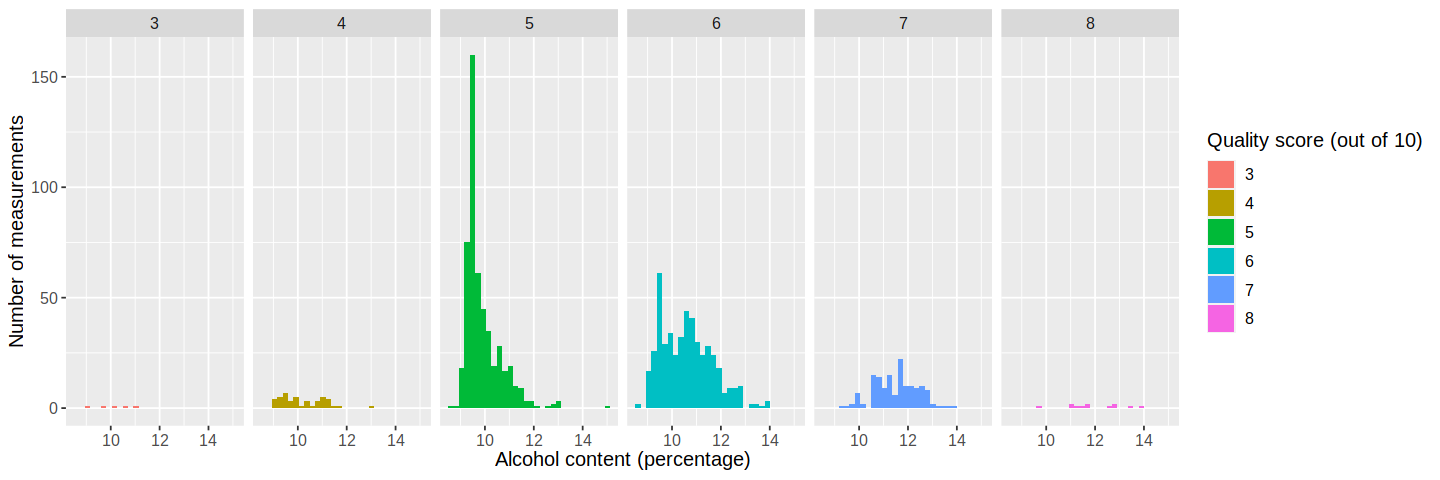

In [71]:
# Histogram to show alcohol measurement distribution
options(repr.plot.width = 12, repr.plot.height = 4)
alcohol_plot <- ggplot(wine_train, aes(x = alcohol, fill = quality)) +
    geom_histogram() +
    facet_grid(cols = vars(quality)) +
    xlab("Alcohol content (percentage)") +
    ylab("Number of measurements") +
    labs(fill = "Quality score (out of 10)") +
    theme(text = element_text(size = 12))
alcohol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


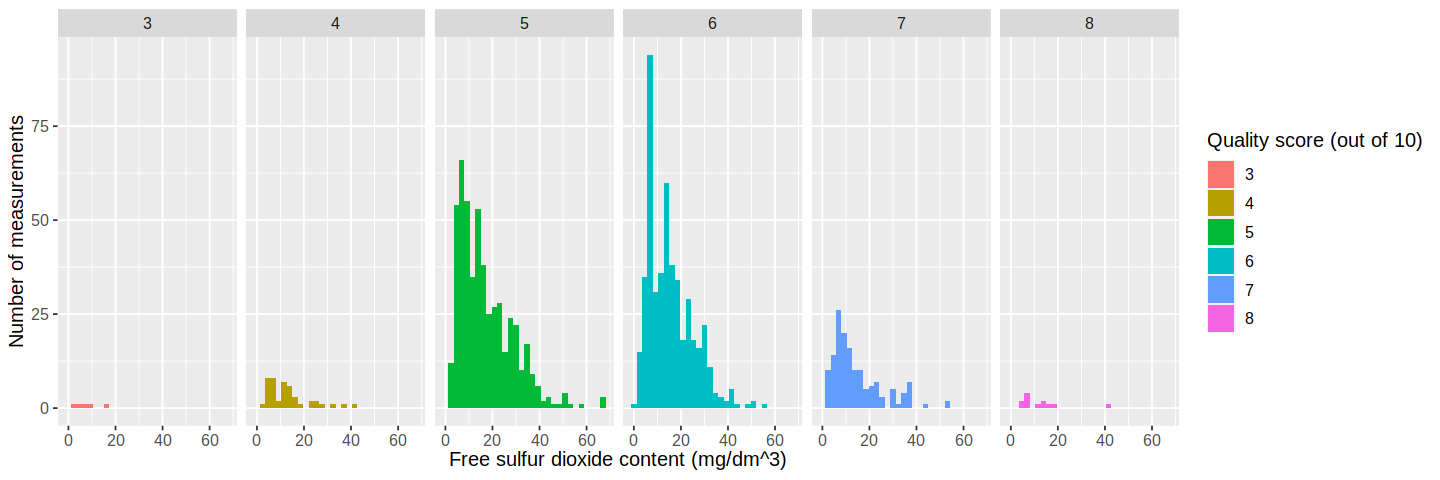

In [72]:
# Histogram to show free sulfur dioxide measurement distribution
options(repr.plot.width = 12, repr.plot.height = 4)
alcohol_plot <- ggplot(wine_train, aes(x = free_sulfur_dioxide, fill = quality)) +
    geom_histogram() +
    facet_grid(cols = vars(quality)) +
    xlab("Free sulfur dioxide content (mg/dm^3)") +
    ylab("Number of measurements") +
    labs(fill = "Quality score (out of 10)") +
    theme(text = element_text(size = 12))
alcohol_plot

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


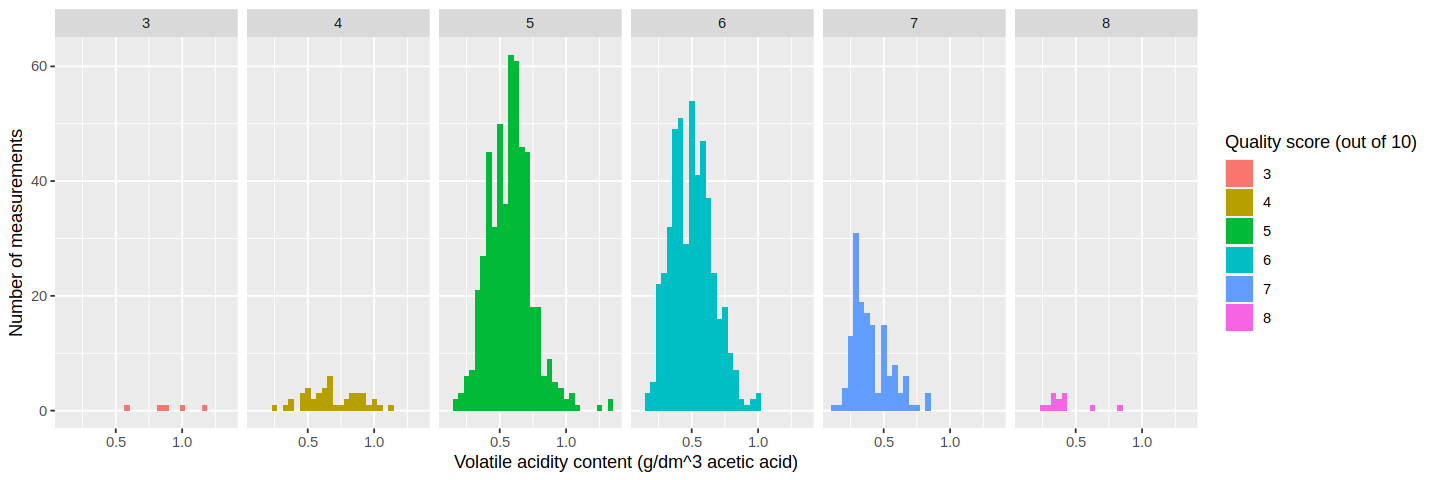

In [74]:
# Histogram to show volatile_acidity measurement distribution
options(repr.plot.width = 12, repr.plot.height = 4)
alcohol_plot <- ggplot(wine_train, aes(x = volatile_acidity, fill = quality)) +
    geom_histogram() +
    facet_grid(cols = vars(quality)) +
    xlab("Volatile acidity content (g/dm^3 acetic acid)") +
    ylab("Number of measurements") +
    labs(fill = "Quality score (out of 10)")
    theme(text = element_text(size = 12))
alcohol_plot